In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('datathon4.csv')
df.head()
print(df.shape)

(91713, 186)


In [ ]:
#import libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_rows', None)
missing_value_counts = df.isnull().sum()
missing_value_counts

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [ ]:
selected_columns = ['hospital_death', 'age', 'gender', 'bmi', 'aids', 'cirrhosis',
                    'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
                    'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
df1 = df[selected_columns]
df1.head()

,hospital_death,age,gender,bmi,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,68.0,M,22.73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,77.0,F,27.42,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,25.0,F,31.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,81.0,F,22.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,19.0,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df1.isnull().sum())

hospital_death                    0
age                            4228
gender                           25
bmi                            3429
aids                            715
cirrhosis                       715
diabetes_mellitus               715
hepatic_failure                 715
immunosuppression               715
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
dtype: int64


In [ ]:
#fill na with median value
df1['age'].fillna(df['age'].median(), inplace=True)
df1['bmi'].fillna(df['bmi'].median(), inplace=True)

In [ ]:
#drop the row of containing null binary variable
df1.dropna(subset=['gender'], inplace=True)
df1.dropna(subset=['aids'], inplace=True)

In [ ]:
#encoding sex to 0 and 1
sex_mapping = {'F': 0, 'M': 1}
df1['gender'] = df1['gender'].map(sex_mapping)

In [ ]:
print(df1.isnull().sum())
print(df1.shape)

hospital_death                 0
age                            0
gender                         0
bmi                            0
aids                           0
cirrhosis                      0
diabetes_mellitus              0
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
dtype: int64
(90973, 12)


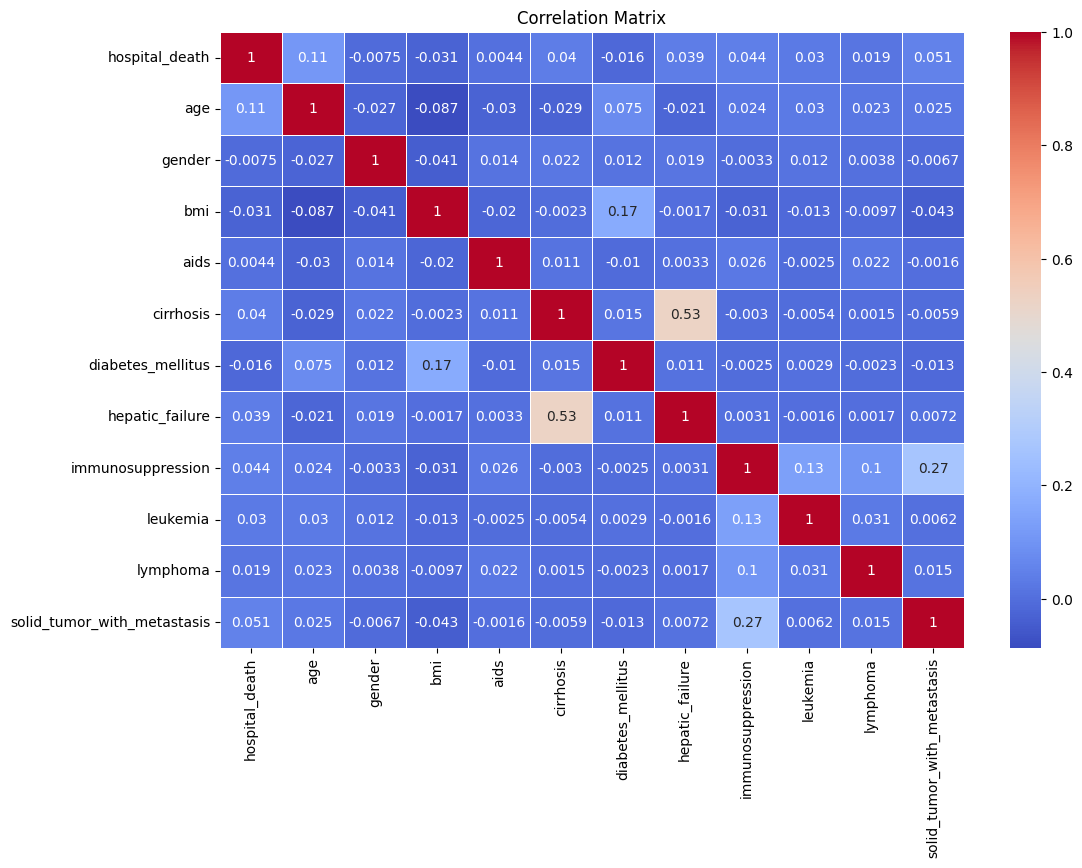

In [ ]:
correlations = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

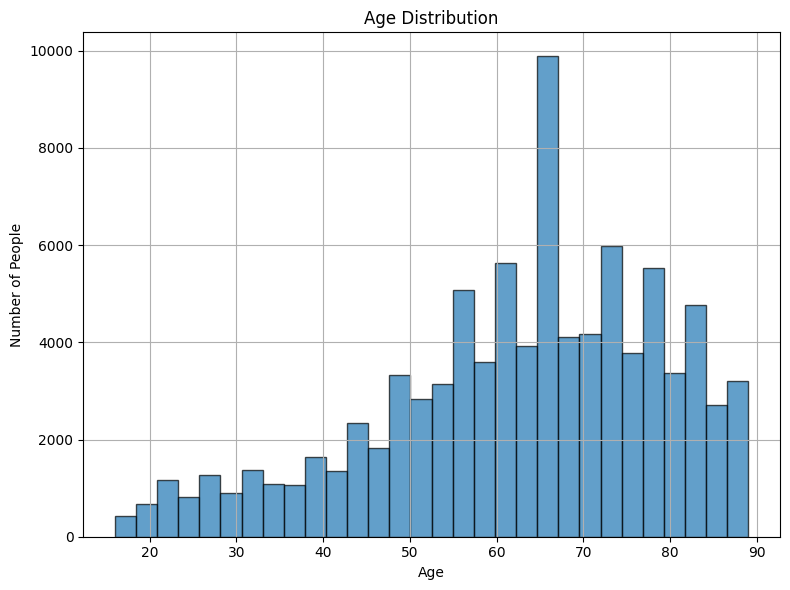

In [ ]:
#histogram for age

plt.figure(figsize=(8, 6))
plt.hist(df1['age'], bins=30, edgecolor='black', alpha=0.7)

# Title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Function to create bar plots for categorical variables
def create_barplot(dataset, cat_var):
  # create a new dataframe to store counts of observations in each group
  cat_counts = dataset.groupby(cat_var).size().reset_index(name='Count')

# plot data
  fig, ax = plt.subplots(figsize=(8, 5))
  sns.barplot(x=cat_counts[cat_var],
            y=cat_counts['Count'],
            ax=ax).set(title=f'Observation Count among {cat_var}')

  ax.bar_label(ax.containers[0], label_type='edge')
  ax.tick_params(axis='x', rotation=45)

  ax.margins(y=0.1)

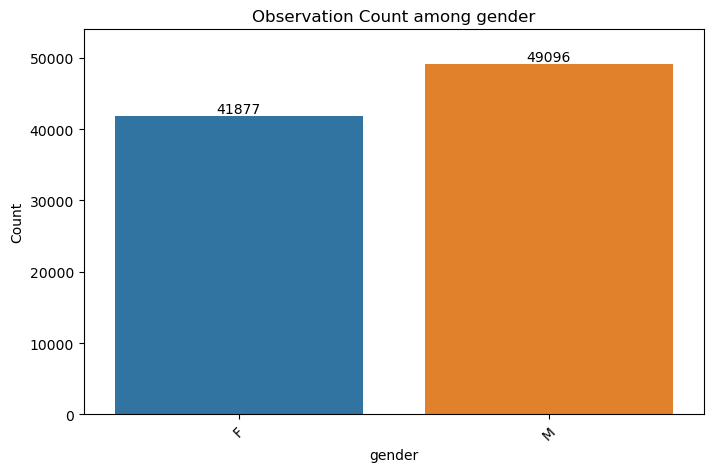

In [ ]:
# Bar plots for gender
create_barplot(df1, 'gender')

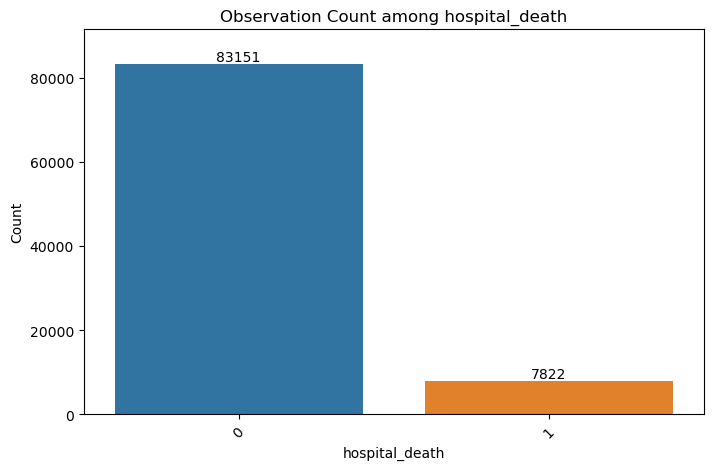

In [ ]:
# Bar plots for hospital death
create_barplot(df1, 'hospital_death')

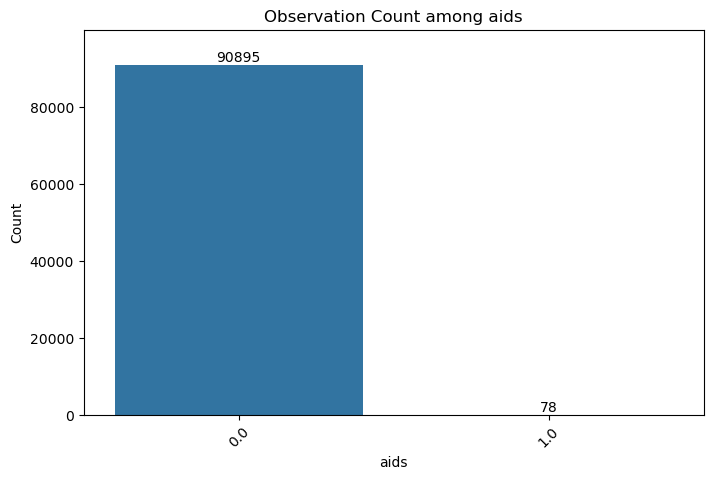

In [ ]:
# Bar plots for hospital death
create_barplot(df1, 'aids')

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df1.drop(['hospital_death'], axis=1)
y = df1['hospital_death']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bernoulli Naive Bayes classifier
clf = BernoulliNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.91

Confusion Matrix:
 [[24911    17]
 [ 2361     3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     24928
           1       0.15      0.00      0.00      2364

    accuracy                           0.91     27292
   macro avg       0.53      0.50      0.48     27292
weighted avg       0.85      0.91      0.87     27292



In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Resampling using SMOTE and do the Navie Bayes again
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Bernoulli Naive Bayes classifier
clf = BernoulliNB()

# Train the classifier on the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.52

Confusion Matrix:
 [[12794 12134]
 [ 1102  1262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.51      0.66     24928
           1       0.09      0.53      0.16      2364

    accuracy                           0.52     27292
   macro avg       0.51      0.52      0.41     27292
weighted avg       0.85      0.52      0.62     27292



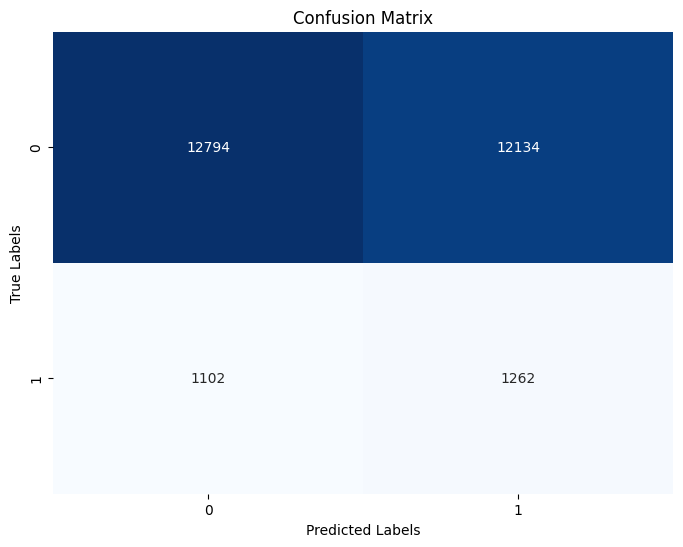

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#use Random Under-Sampling
from imblearn.under_sampling import RandomUnderSampler
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Create a Bernoulli Naive Bayes classifier
clf = BernoulliNB()

# Train the classifier on the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.87

Confusion Matrix:
 [[23378  1550]
 [ 2083   281]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     24928
           1       0.15      0.12      0.13      2364

    accuracy                           0.87     27292
   macro avg       0.54      0.53      0.53     27292
weighted avg       0.85      0.87      0.86     27292



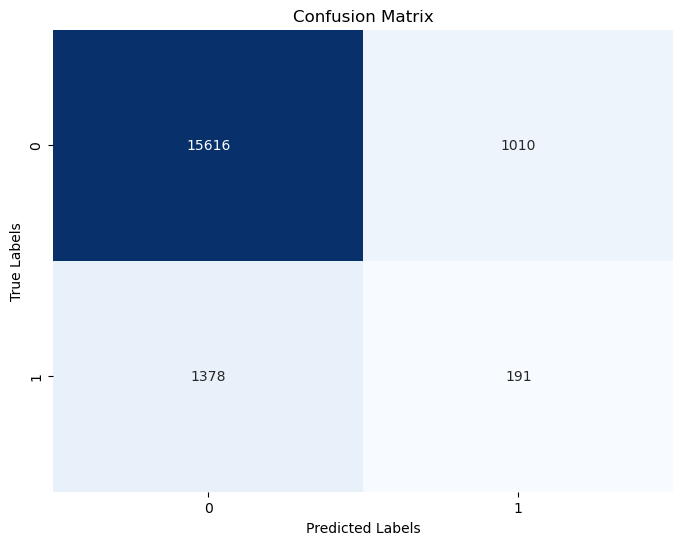

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
# Split the data into training and testing sets
X = df1.drop(['hospital_death'], axis=1)
y = df1['hospital_death']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=26)

# Split the temporary set into testing (15%) and validation (15%)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_valid_resampled, y_valid_resampled = smote.fit_resample(X_valid, y_valid)

smote = SMOTE(random_state=42)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

# Create Gaussian Naive Bayes and Bernoulli Naive Bayes classifiers
gnb = GaussianNB()
bnb = BernoulliNB()

# Fit the models on the resampled training data
gnb.fit(X_train_resampled, y_train_resampled)
bnb.fit(X_train_resampled, y_train_resampled)

gnb.fit(X_valid_resampled, y_valid_resampled)
bnb.fit(X_valid_resampled, y_valid_resampled)

gnb.fit(X_test_resampled, y_test_resampled)
bnb.fit(X_test_resampled, y_test_resampled)

# Create a VotingClassifier with a combination of models
voting_clf = VotingClassifier(estimators=[('gaussian', gnb), ('bernoulli', bnb)], voting='hard')

# Train the ensemble model on the training data
voting_clf.fit(X_train_resampled, y_train_resampled)
voting_clf.fit(X_valid_resampled, y_valid_resampled)
voting_clf.fit(X_test_resampled, y_test_resampled)

# Make predictions on the test data
y_pred_test = voting_clf.predict(X_test)
y_pred_valid = voting_clf.predict(X_valid)


# Evaluate the performance of the ensemble model

print('======== Validation Set ==========')
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
conf_matrix_valid = confusion_matrix(y_valid, y_pred_valid)
classification_rep_valid = classification_report(y_valid, y_pred_valid)

print(f"Accuracy: {accuracy_valid:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_valid)
print("\nClassification Report:\n", classification_rep_valid)

accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

print('======== testing Set ==========')
print(f"Accuracy: {accuracy_test:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_test)
print("\nClassification Report:\n", classification_rep_test)




======== Validation Set ==========
Accuracy: 0.87

Confusion Matrix:
 [[11659   780]
 [ 1060   147]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     12439
           1       0.16      0.12      0.14      1207

    accuracy                           0.87     13646
   macro avg       0.54      0.53      0.53     13646
weighted avg       0.85      0.87      0.86     13646

======== testing Set ==========
Accuracy: 0.87

Confusion Matrix:
 [[11756   766]
 [  967   157]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     12522
           1       0.17      0.14      0.15      1124

    accuracy                           0.87     13646
   macro avg       0.55      0.54      0.54     13646
weighted avg       0.86      0.87      0.87     13646

